# Autohaus Datensatz

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_moons 


In [77]:
X_array, y_array = make_moons(noise = 0.5, n_samples=50)

# shift all feature values to a positive range and 
# convert it to an integer matrix
X_array = X_array + 1.2 * np.abs(np.min(X_array))
X_array[:,0] = np.ceil(X_array[:,0] * 30000)
X_array[:,1] = np.ceil(X_array[:,1] * 10000)
X = pd.DataFrame(X_array, columns=['Kilometerstand [km]', 'Preis [EUR]'], dtype=(int, int))

# map 0.0 to True and 1.0 to False
y_array = (y_array - 1.0) * (-1)
y = pd.Series(y_array, name='verkauft', dtype='bool')

# visualization
fig = px.scatter(x = X['Kilometerstand [km]'], y = X['Preis [EUR]'], color=y,
    title='Künstliche Daten Autohaus',
    labels={'x': 'Kilometerstand [km]', 'y': 'Preis [EUR]', 'color': 'verkauft'})
fig.show()

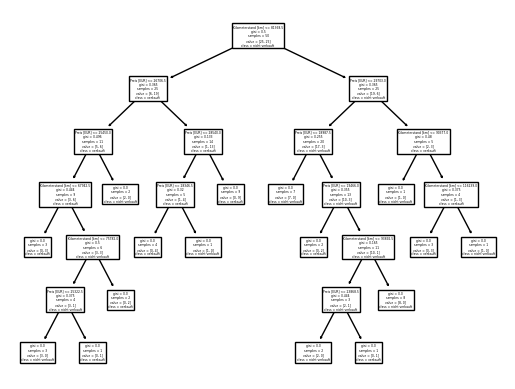

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

modell = DecisionTreeClassifier()
modell.fit(X,y)

plot_tree(modell,
    feature_names=['Kilometerstand [km]', 'Preis [EUR]'],
    class_names=['nicht verkauft', 'verkauft']);

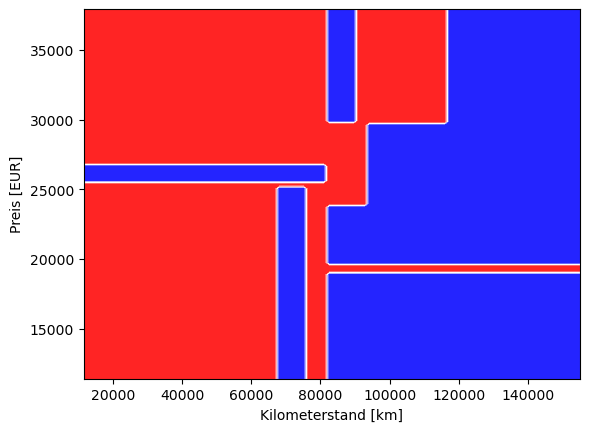

In [79]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(modell, X, cmap=plt.cm.bwr)

In [71]:
x0_min = X_array[:,0].min()
x0_max = X_array[:,0].max()
x1_min = X_array[:,1].min()
x1_max = X_array[:,1].max()

import numpy as np
gitter_x1, gitter_x2 = np.meshgrid(np.linspace(x0_min, x0_max), np.linspace(x1_min, x1_max))
gitter_y = modell.predict(pd.DataFrame({'Kilometerstand [km]': gitter_x1.ravel(), 'Preis [EUR]': gitter_x2.ravel()}))

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x = gitter_x1.ravel(), y = gitter_x2.ravel(), 
                         marker_color=gitter_y.ravel(), mode='markers', opacity=0.1, name='Gitter'))
fig.add_trace(go.Scatter(x = X_array[:,0], y = X_array[:,1], mode='markers', marker_color=y_array, name='Daten'))
fig.update_layout(
  title='Künstliche Messdaten',
  xaxis_title = 'Feature 1',
  yaxis_title = 'Feature 2'
)